In [1]:
#Importing Libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

In [3]:
df = pd.read_csv("../../Datasets_Mainflow/heart_failure_clinical_records_dataset.csv")

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
from sklearn.feature_selection import VarianceThreshold

X= df.drop('DEATH_EVENT', axis=1)
y= df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)


vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)

,Feature,Variance
10,smoking,0.210572
5,high_blood_pressure,0.228704
9,sex,0.232687
3,diabetes,0.239418
1,anaemia,0.243767
7,serum_creatinine,0.995251
8,serum_sodium,18.556672
0,age,55.000000
4,ejection_fraction,60.000000
11,time,281.000000


Feature 0 : 19.133
Feature 1 : 0.129
Feature 2 : 0.099
Feature 3 : 0.018
Feature 4 : 13.347
Feature 5 : 0.456
Feature 6 : 0.089
Feature 7 : 27.949
Feature 8 : 6.244
Feature 9 : 1.076
Feature 10 : 0.354
Feature 11 : 82.186



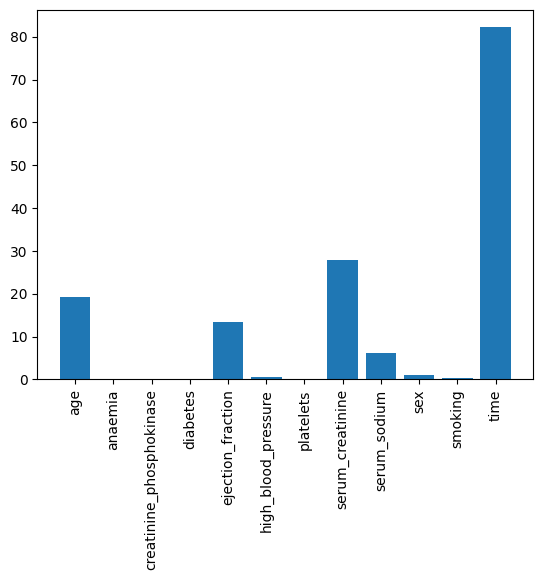

In [5]:
#K-BEST For CLASSIFIER 

X= df.drop('DEATH_EVENT', axis=1)
y= df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)

Kbest_classif = SelectKBest(score_func=f_classif, k=6)
Kbest_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

#Based on the SelectKBest, ['age','ejection_fraction','serum_creatinine', 'serum_sodium','sex','time'] are selected.

In [6]:
# transform training set
X_train_classif = Kbest_classif.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_selected.shape: {}".format(X_train_classif.shape))
print()
# transform test data
X_test_classif = Kbest_classif.transform(X_test)

X_train.shape: (209, 12)

X_train_selected.shape: (209, 6)



In [7]:
lor = LogisticRegression(solver='liblinear', random_state=0)
lor.fit(X_train, y_train)

print(f'Score with all features: {round(lor.score(X_test, y_test),4)}')

lor.fit(X_train_classif, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_classif, y_test),4)}')

Score with all features: 0.7667
Score with only selected features: 0.7778


In [8]:


# RFE with Logistic Regression
model = LogisticRegression(solver='liblinear', random_state=0)
rfe = RFE(model, n_features_to_select=6)
rfe.fit(X_train, y_train)

# Print selected features
print(f'Selected features: {X_train.columns[rfe.support_]}')

# Evaluate model performance with selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)
print(f'Score with RFE selected features: {round(model.score(X_test_rfe, y_test), 4)}')


Selected features: Index(['age', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine',
       'sex', 'smoking'],
      dtype='object')
Score with RFE selected features: 0.6889


In [9]:
#Feature Importance from Tree-based Models

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print feature importances
print(feature_importances)

# Select top 6 features
top_features = feature_importances['feature'][:6]
X_train_rf = X_train[top_features]
X_test_rf = X_test[top_features]

# Evaluate model performance with selected features
rf.fit(X_train_rf, y_train)
print(f'Score with RF selected features: {round(rf.score(X_test_rf, y_test), 4)}')


                     feature  importance
11                      time    0.368406
7           serum_creatinine    0.160000
4          ejection_fraction    0.114102
0                        age    0.081839
6                  platelets    0.077779
2   creatinine_phosphokinase    0.076427
8               serum_sodium    0.063869
9                        sex    0.015064
3                   diabetes    0.012120
5        high_blood_pressure    0.010507
10                   smoking    0.010096
1                    anaemia    0.009791
Score with RF selected features: 0.7333


In [10]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search with Random Forest
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_rf, y_train)

# Print best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

# Evaluate best model on test data
best_rf = grid_search.best_estimator_
print(f'Score with best RF model: {round(best_rf.score(X_test_rf, y_test), 4)}')


Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 0.8758420441347271
Score with best RF model: 0.7444


In [11]:
# PCA (Principal Component Analysis)

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and evaluate model with PCA features
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_pca, y_train)
print(f'Score with PCA features: {round(model.score(X_test_pca, y_test), 4)}')


Score with PCA features: 0.8222


In [12]:
# Evaluate Different Models

from sklearn.ensemble import GradientBoostingClassifier

# Evaluate different models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=0),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_classif, y_train)
    score = model.score(X_test_classif, y_test)
    print(f'{name} score: {round(score, 4)}')


Logistic Regression score: 0.7778
Random Forest score: 0.7778
Gradient Boosting score: 0.7222
